In [1]:
import os
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from glob import glob

sns.set(context='talk', style='white')

study_dir = '/Users/catcamacho/Library/CloudStorage/Box-Box/CRAB/CRAB_lab/studies/crab-seal_hbcdmovies_pilot_2025'
data_dir = os.path.join(study_dir, 'DATA','V1_motion_processed')

subs = sorted(os.listdir(data_dir))

In [2]:
data = pd.DataFrame()
i=0
for sub in subs:
    subdata = pd.read_csv(os.path.join(data_dir, sub, '{0}_motion_summary.csv'.format(sub)), index_col=0)
    for movie in subdata.index:
        data.loc[i, 'sub'] = sub
        data.loc[i, 'movie'] = movie
        data.loc[i, 'meanFD'] = subdata.loc[movie, 'meanFD']
        data.loc[i, 'pcCens9'] = subdata.loc[movie, 'pcent_volscens_0.9']
        data.loc[i, 'pcCens2'] = subdata.loc[movie, 'pcent_volscens_0.2']
        i=i+1

data.describe()

,meanFD,pcCens9,pcCens2
count,42.000000,42.000000,42.000000
mean,1.070521,0.177482,0.526129
std,0.951240,0.141188,0.213914
min,0.240188,0.026820,0.169860
25%,0.414447,0.076855,0.338029
50%,0.631905,0.116467,0.515109
75%,1.457711,0.212888,0.691977
max,3.756210,0.556423,0.919568


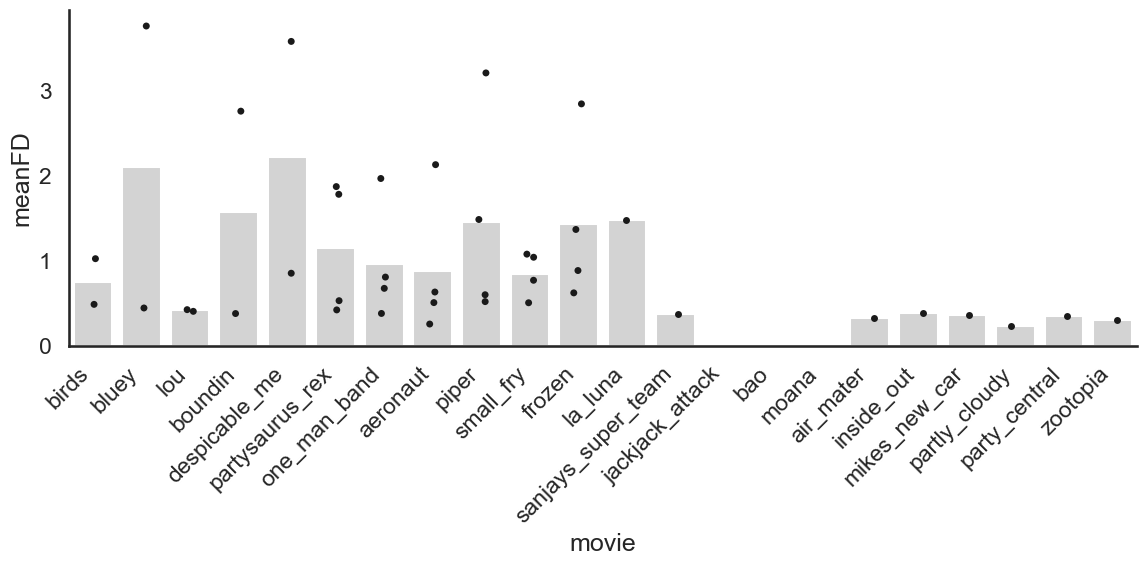

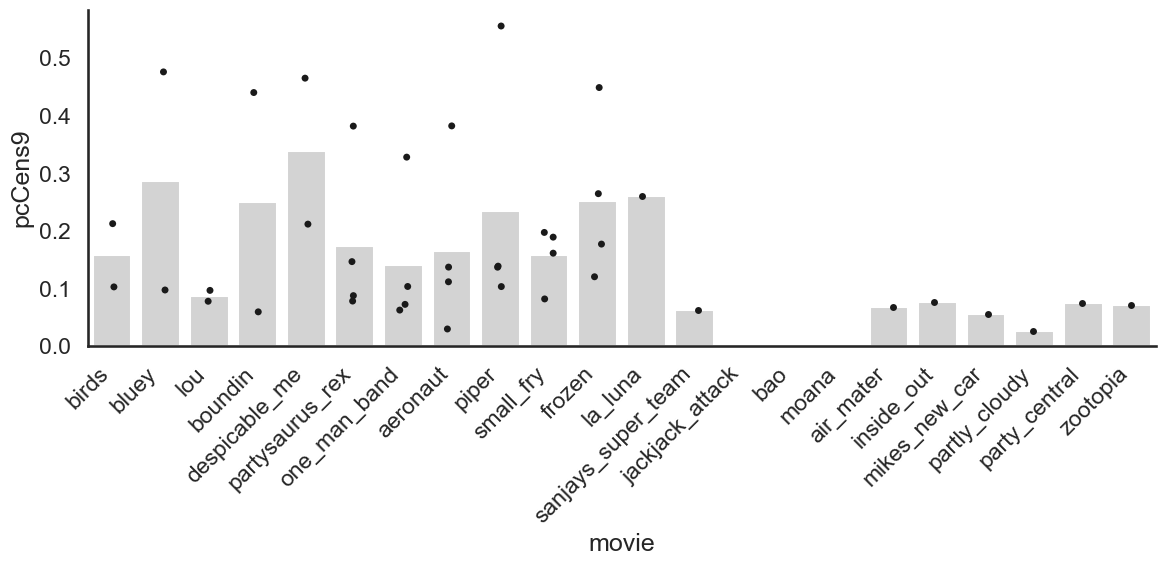

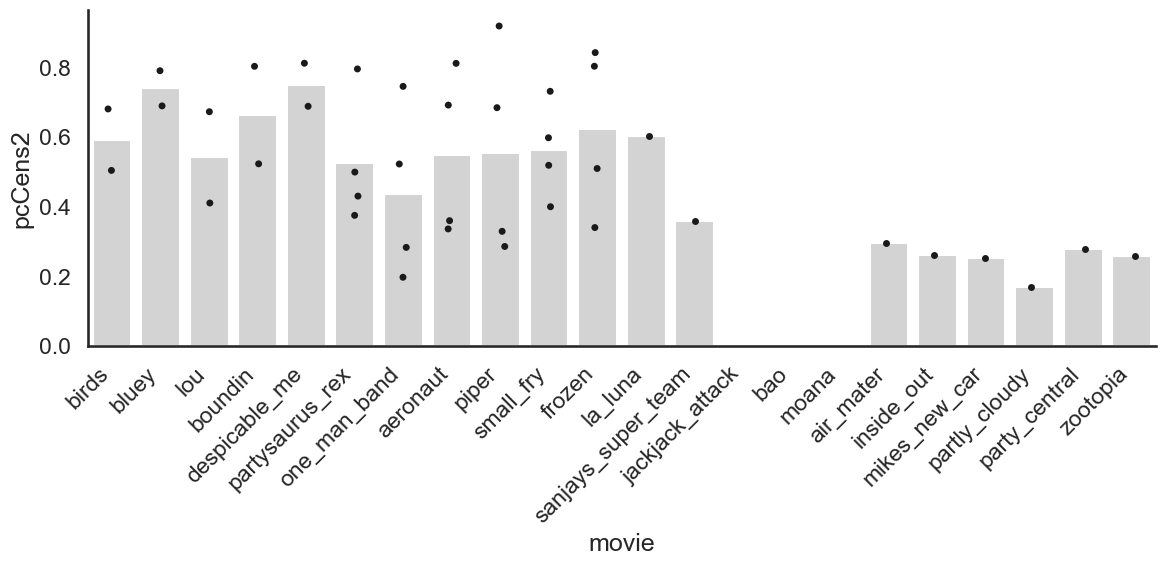

In [5]:
# plot mean FD

for v in ['meanFD','pcCens9','pcCens2']:

    plt.figure(figsize=(12,6))
    sns.barplot(y=v,x='movie', data=data, color='lightgray',errwidth=0)
    sns.stripplot(y=v,x='movie', data=data, color='k')
    plt.xticks(rotation=45, ha='right')
    sns.despine()
    plt.tight_layout()
    plt.show()
    plt.close()